<a href="https://colab.research.google.com/github/SheshamJoseph/Happy_Sad_Image_Classifier/blob/main/happy_sad_image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Happy or Sad Image classifier

## Getting the data

In [ ]:
import tensorflow as tf
import cv2
import imghdr
import os

In [ ]:
# !mkdir data

In [ ]:
# upload zip files of both happy and images
from google.colab import files
files.upload()

Saving happy.zip to happy.zip
Saving sad.zip to sad.zip
Buffered data was truncated after reaching the output size limit.

In [4]:
!mkdir data
!unzip -q happy.zip -d data
!unzip -q sad.zip -d data

In [ ]:
# from zipfile import ZipFile
# happy_dir = 'data/happy.zip'
# sad_dir = 'data/sad.zip'
# zips = [happy_dir, sad_dir]
# for zip in zips:
#     with ZipFile(zip, 'r') as zipObj:
#         zipObj.extractall('data')


In [ ]:
!rm data/happy.zip
!rm data/sad.zip

In [6]:
data_dir = 'data'
os.listdir(os.path.join(data_dir, 'happy'))

['goup-happy-people-group-jumping-isolated-white-background-35582232.jpg',
 'rating-victory-isolated-white-background-concept-friendship-healthy-91211177.jpg',
 '8fc39ae2301e4355a91340731ed2198f_320_320.jpeg',
 'Happiness-Habits-10-Things-Happy-People-Do-Before-Bed-800x450.jpg',
 'nm-how-happiness-affects-health-tnail.jpg',
 'kiKoxodyT.jpg',
 'happy-people-illustration-modern-style-graphic-art-vector.jpg',
 'image26.jpeg',
 '7-principles-of-successful-and-happy-people.png',
 'image25.jpeg',
 '_470x410_0045_11-habits-of-truly-happy-people.jpg',
 'GettyImages-871518740.jpg',
 'happy-people-group-fb.jpg',
 'image23.jpeg',
 'image30.jpeg',
 'maxresdefault.jpg',
 '360_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg',
 'hand-drawn-happy-people-jumping_23-2149092878.jpg',
 'image9.jpeg',
 '25115.jpg',
 'habits-of-happy-people-jpg.jpg',
 'happy_1_1678616873966_1678616915228_1678616915228.jpg',
 '360_F_709672486_C7eaa5uLXe7qjYwuX0BvPeaUSemlVzpZ.jpg',
 '170404-happy-workers-feature.jpg',
 'happ

In [7]:
img_extensions = ['jpg', 'jpeg', 'png', 'bmp']
for image_class in os.listdir(os.path.join(data_dir)):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            ext = imghdr.what(image_path)
            if ext not in img_extensions:
                print(f'{image_path} extension not in extension list')
                os.remove(image_path)
        except Exception as e:
            print(f'Issue with image {image_path}')
            # os.remove(image_path)

## Loading the data

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
dataset = tf.keras.utils.image_dataset_from_directory('data')

Found 167 files belonging to 2 classes.


In [10]:
# checkout an example
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1 1]


In [11]:
class_names = dataset.class_names
class_names

['happy', 'sad']

In [12]:
dataset.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

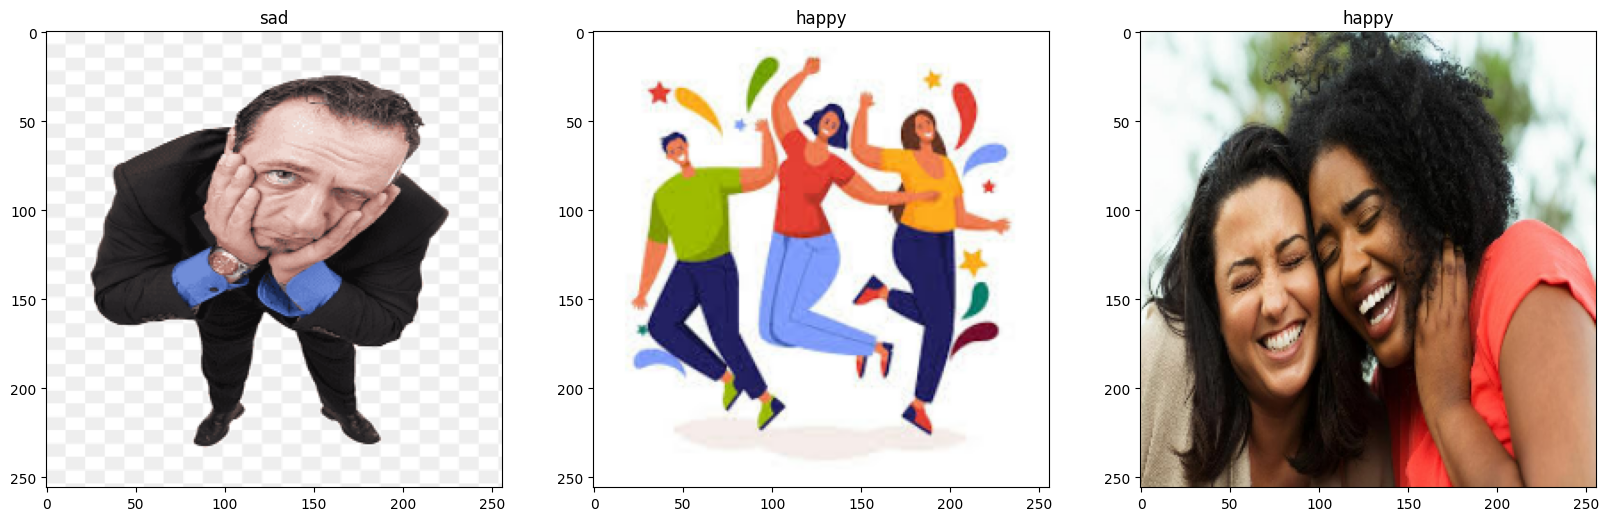

In [16]:
# preview a sample
image_batch, label_batch = dataset.as_numpy_iterator().next()
fig, ax = plt.subplots(ncols=3, figsize=(20,20))
for idx, img in enumerate(image_batch[:3]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(class_names[label_batch[idx]])

## Preprocess

In [17]:
# first scale the dataset
data = dataset.map(lambda x,y: (x/255, y))

In [18]:
data.as_numpy_iterator().next()[0].max()

1.0

In [19]:
data.as_numpy_iterator().next()[0].min()

0.0

In [20]:
data.as_numpy_iterator().next()[0]

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [21]:
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

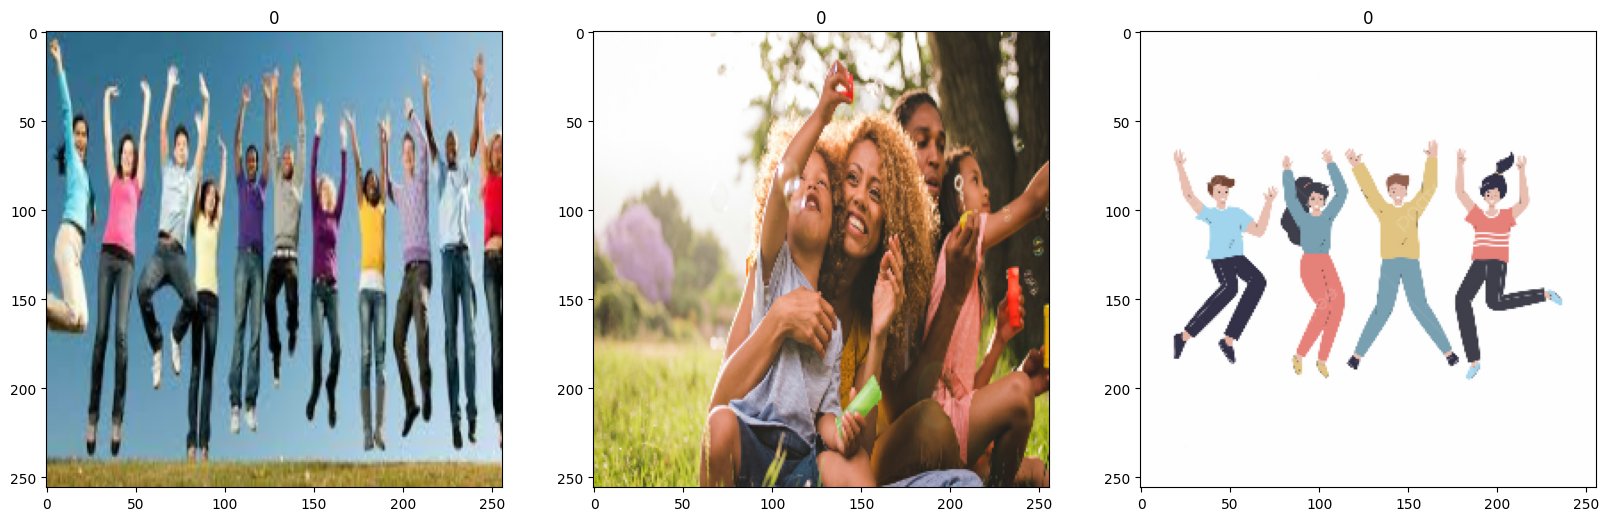

In [22]:
fig, ax = plt.subplots(ncols=3, figsize=(20,20))
for idx, img in enumerate(batch[0][:3]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [28]:
# splitting the data
train_size = int(len(dataset) * .7)
test_size = int(len(dataset) * .2)
val_size = int(len(dataset) - train_size - test_size)

In [29]:
train_size, test_size, val_size

(4, 1, 1)

In [30]:
len(dataset)

6

In [31]:
train_data = data.take(train_size)
test_data = data.skip(train_size).take(test_size)
val_data = data.skip(train_size + test_size).take(val_size)

## Building the model

In [35]:
from tensorflow.keras.models import Sequential

tf.random.set_seed(42)
model = Sequential([
    tf.keras.layers.Input(shape=(256,256,3)),
    tf.keras.layers.Conv2D(16, (3,3), 1, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, (3,3), 1, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(16, (3,3), 1, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [36]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
train_history = model.fit(
    train_data,
    epochs=15,
    validation_data=val_data
)

Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.4719 - loss: 1.3921 - val_accuracy: 0.4286 - val_loss: 1.3422
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.3792 - loss: 0.9735 - val_accuracy: 0.5714 - val_loss: 0.6561
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.6000 - loss: 0.6244 - val_accuracy: 0.5714 - val_loss: 0.6117
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.6594 - loss: 0.6311 - val_accuracy: 0.8571 - val_loss: 0.5704
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.7812 - loss: 0.5570 - val_accuracy: 0.7143 - val_loss: 0.5476
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.7833 - loss: 0.4551 - val_accuracy: 1.0000 - val_loss: 0.2305
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8875 - loss: 0.3412 - val_accuracy: 0.8571 - val_loss: 0.3901
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8885 - loss: 0.2633 - val_accuracy: 1.0000 - val_loss: 0.1981
Epoch 9/

In [41]:
model.evaluate(test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0383


[0.038293518126010895, 1.0]

Text(0, 0.5, 'Accuracy')

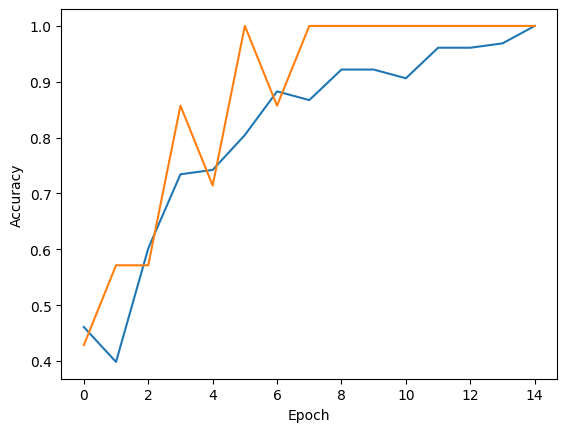

In [42]:
# Plot the accuracy and loss curves
import matplotlib.pyplot as plt
plt.plot(train_history.history['accuracy'], label='accuracy')
plt.plot(train_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

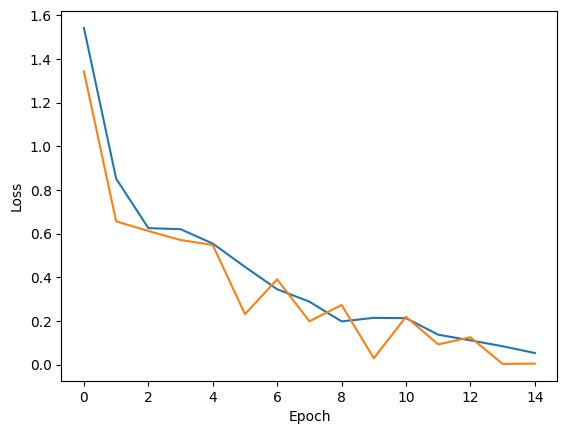

In [43]:
plt.plot(train_history.history['loss'], label='loss')
plt.plot(train_history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

## Evaluate Performance

In [44]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

for batch in test_data.as_numpy_iterator():
    X, y = batch
    preds = model.predict(X)
    precision.update_state(y, preds)
    recall.update_state(y, preds)
    accuracy.update_state(y, preds)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


In [45]:
print(f'Precision: {precision.result().numpy()}')
print(f'Recall: {recall.result().numpy()}')
print(f'Accuracy: {accuracy.result().numpy()}')

Precision: 1.0
Recall: 1.0
Accuracy: 1.0


In [46]:
# test on images
import cv2

files.upload()

Saving test_happy.jpg to test_happy.jpg


{'test_happy.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x0f\x0f\x12\x15\x10\x10\x12\x0f\x0f\x10\x0f\x0f\x0f\x0f\x0f\x0f\x10\x0f\x0f\x0f\x10\x0f\x0f\x15\x11\x16\x16\x15\x15\x15\x15\x18\x1d( \x18\x1a%\x1b\x15\x15!1!%)+...\x17\x1f383-7(-.+\x01\n\n\n\x0e\r\x0e\x1a\x10\x10\x1a-% %--------------------+-----------------------------\xff\xc0\x00\x11\x08\x00\xb7\x01\x13\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x01\x00\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x02\x04\x01\x05\x06\x07\x00\xff\xc4\x00=\x10\x00\x02\x01\x02\x04\x03\x06\x05\x01\x07\x03\x03\x05\x00\x00\x00\x01\x02\x00\x03\x11\x04\x12!1\x05AQ\x06\x13"aq\x812\x91\xa1\xb1\xc1R\x07\x14#Bbr\xd13\x92\xf0$\x82\xa2\x15\xb2\xc2\xe1\xf1\xff\xc4\x00\x1b\x01\x01\x00\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\xff\xc4\x000\x11\x00\x02\x02\x01\x03\x02\x04\x04\x06\x03\x01\x01\x00\x00\x00\x00\x00\x01\x02\x11\

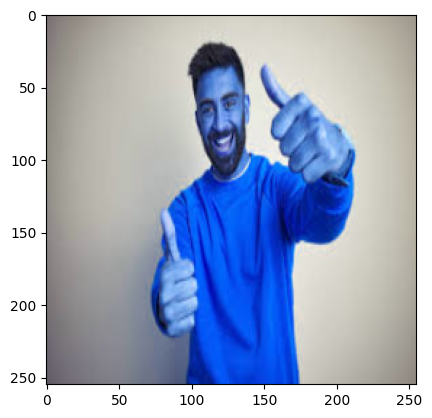

In [52]:
try:
    img = cv2.imread('test_happy.jpg')
except:
    print("Image not loaded properly")
else:
    img = cv2.resize(img, (255,255))
plt.imshow(img)

In [58]:
img = img / 255.0
img.shape

(255, 255, 3)

In [59]:
img = tf.expand_dims(img, axis=0)
img.shape

TensorShape([1, 255, 255, 3])

(32, 256, 256, 3)

In [66]:
test_pred = model.predict([img])
test_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


array([[0.9999189]], dtype=float32)

In [67]:
# save the model
model.save('happy_sad_classifier.keras')